In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

features = ["buying","maint","doors","persons","lug_boot","safety","class"]
df_data = pd.read_csv('C:/Users/jhjjh/Downloads/car.data')
df_data = df_data.to_numpy()
df = pd.DataFrame(df_data, columns=features)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [30]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

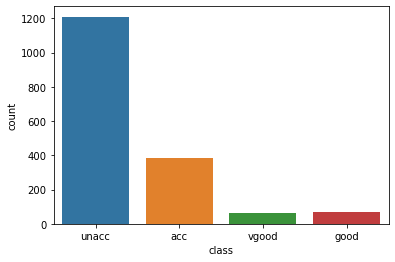

In [31]:
sns.countplot(data=df,x="class" )

In [32]:
df["class"].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [33]:
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])
    
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [34]:
#Splitting the data into training and test test
X = df.iloc[:,1:23].values
y = df.iloc[:,0].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [38]:
X

array([[3, 0, 0, 2, 2, 2],
       [3, 0, 0, 2, 0, 2],
       [3, 0, 0, 1, 1, 2],
       ...,
       [1, 3, 2, 0, 1, 2],
       [1, 3, 2, 0, 2, 1],
       [1, 3, 2, 0, 0, 3]])

In [39]:
Y

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]], dtype=uint8)

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(6,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='sigmoid'))

model.compile(Adam(lr=0.001),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                70        
                                                                 
 dense_23 (Dense)            (None, 8)                 88        
                                                                 
 dense_24 (Dense)            (None, 8)                 72        
                                                                 
 dense_25 (Dense)            (None, 8)                 72        
                                                                 
 dense_26 (Dense)            (None, 4)                 36        
                                                                 
Total params: 338
Trainable params: 338
Non-trainable params: 0
_________________________________________________________________


In [49]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 1s 7ms/step - loss: 1.4881 - accuracy: 0.2505 - val_loss: 1.4146 - val_accuracy: 0.2630
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 1.3927 - accuracy: 0.2563 - val_loss: 1.4027 - val_accuracy: 0.2428
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 1.3875 - accuracy: 0.2715 - val_loss: 1.3998 - val_accuracy: 0.2457
Epoch 4/100
44/44 [==============================] - 0s 4ms/step - loss: 1.3858 - accuracy: 0.2744 - val_loss: 1.3982 - val_accuracy: 0.2514
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 1.3838 - accuracy: 0.2781 - val_loss: 1.3962 - val_accuracy: 0.2601
Epoch 6/100
44/44 [==============================] - 0s 4ms/step - loss: 1.3824 - accuracy: 0.2889 - val_loss: 1.3960 - val_accuracy: 0.2601
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 1.3813 - accuracy: 0.2839 - val_loss: 1.3947 - val_accuracy: 0.2630
Epoch 8/100
4

Epoch 59/100
44/44 [==============================] - 0s 2ms/step - loss: 1.3396 - accuracy: 0.3230 - val_loss: 1.3741 - val_accuracy: 0.2197
Epoch 60/100
44/44 [==============================] - 0s 2ms/step - loss: 1.3368 - accuracy: 0.3259 - val_loss: 1.3736 - val_accuracy: 0.2283
Epoch 61/100
44/44 [==============================] - 0s 2ms/step - loss: 1.3369 - accuracy: 0.3280 - val_loss: 1.3726 - val_accuracy: 0.2197
Epoch 62/100
44/44 [==============================] - 0s 3ms/step - loss: 1.3365 - accuracy: 0.3208 - val_loss: 1.3755 - val_accuracy: 0.2341
Epoch 63/100
44/44 [==============================] - 0s 2ms/step - loss: 1.3372 - accuracy: 0.3172 - val_loss: 1.3740 - val_accuracy: 0.2341
Epoch 64/100
44/44 [==============================] - 0s 2ms/step - loss: 1.3361 - accuracy: 0.3266 - val_loss: 1.3714 - val_accuracy: 0.2312
Epoch 65/100
44/44 [==============================] - 0s 2ms/step - loss: 1.3343 - accuracy: 0.3266 - val_loss: 1.3729 - val_accuracy: 0.2312
Epoch 

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.36      0.11      0.17        83
           1       0.26      0.41      0.32        87
           2       0.24      0.09      0.13        91
           3       0.29      0.49      0.36        85

    accuracy                           0.27       346
   macro avg       0.28      0.28      0.24       346
weighted avg       0.28      0.27      0.24       346

[[ 9 26  7 41]
 [ 2 36 17 32]
 [ 7 44  8 32]
 [ 7 34  2 42]]


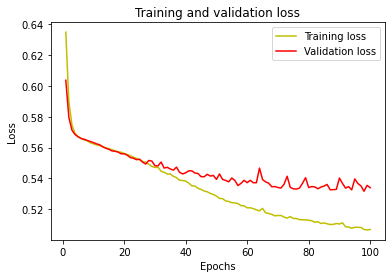

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

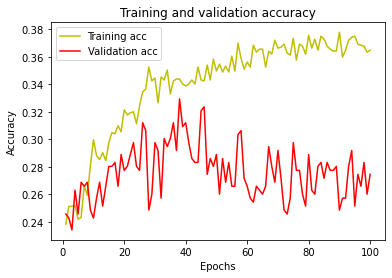

In [41]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()